In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

### DATASET

dimmension de X: (100, 2)
dimmension de y: (100, 1)


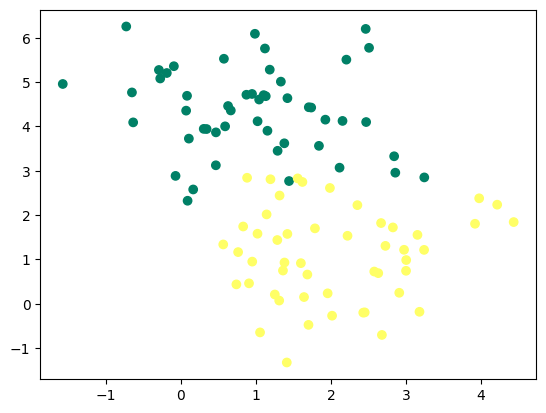

In [18]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0)
y = y.reshape((y.shape[0],1))

print ('dimmension de X:', X.shape)
print ('dimmension de y:', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

### FUNCTIONS

In [19]:
# Fonction Modèle

def model(X, W, b):
    Z = X.dot(W) + b

    A = 1 / (1 + np.exp(-Z))
    return A

# Fonction de coût

def log_loss(A, y):
    m = y.shape[0]
    return -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

# Fonction de dérivée (gradient)

def gradient(X, A, y):
    m = y.shape[0]
    dW = 1/m * np.dot(X.T, (A - y))
    db = 1/m * np.sum(A - y)
    return dW, db

def update_parameters(W, b, dW, db, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

### PREDICTIONS

In [20]:
def predict(X, W, b):
    A = model(X, W, b)
    print('Probabilité de prédiction de toxicité de la plante :' , str(A[0] * 100) + ' %')
    return A >= 0.5

### INITIALISATION - TRAIN

In [32]:
def init(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = init(X)

    history = []
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradient(X, A, y)
        W, b = update_parameters(W, b, dW, db, learning_rate)
        history.append([W, b, Loss, i])

    y_pred = predict(X, W, b)
    print('Accuracy:', accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()    

    return history

### TESTS

dimmension de W: (2, 1)
dimmension de b: (1,)
b : [-1.97777087]
dimmensiond e A : (100, 1)
log loss : 2.1227383351450855
dimmension de dW: (2, 1)
dimmension de db: ()
db : -0.46288564679702854
dimmension de W: (2, 1)
dimmension de b: (1,)
b : [-1.97314201]
Probabilité de prédiction de toxicité de la plante : [84.92834107] %
Accuracy: 0.94


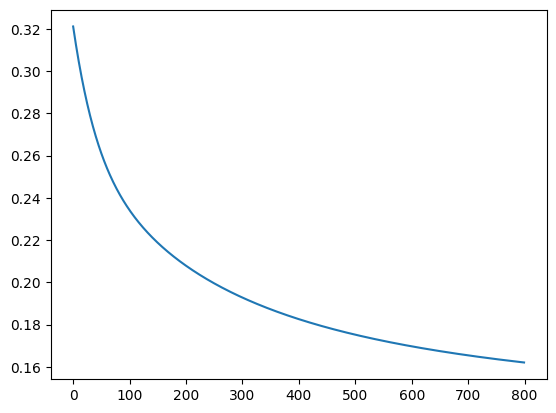

In [70]:
W, b = init(X)
print ('dimmension de W:', W.shape)
print ('dimmension de b:', b.shape)
print ('b :' ,b)

A = model(X, W, b)
print ('dimmensiond e A :' ,A.shape)
print ('log loss :' ,log_loss(A, y))

dW , db = gradient(X, A, y)
print ('dimmension de dW:', dW.shape)
print ('dimmension de db:', db.shape)
print ( 'db :' ,db)

W, b = update_parameters(W, b, dW, db, 0.01)
print ('dimmension de W:', W.shape)
print ('dimmension de b:', b.shape)
print ('b :' ,b)

history = artificial_neuron(X, y, learning_rate = 0.01, n_iter = 800)
W, b, Loss, i = history[-1]

### DO PREDICTION ON NEW PLANT

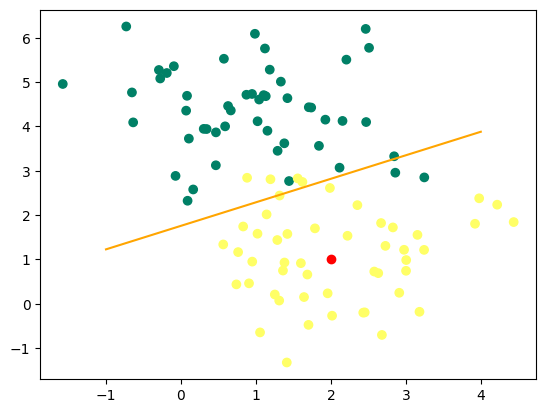

Probabilité de prédiction de toxicité de la plante : 97.13587499345883 %
Prediction: [ True]


In [58]:
new_plant = np.array([2, 1])


x0 = np.linspace(-1, 4, 100)
x1 = -(W[0] * x0 + b) / W[1]


plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.plot(x0, x1, c='orange')
plt.show()

prediction = predict(new_plant, W, b)
print('Prediction:', prediction)

### FIGURE 3D

In [59]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template='plotly_dark', title='Données de plantes', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
fig.show()

In [60]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=X0, y=X1, colorscale='YlGn', opacity=0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity=0.9, reversescale=True))


fig.update_layout(template='plotly_dark', title='Frontière de décision', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
fig.show()

### Animation d'évolution

In [65]:
def animate(params):
    W = params[0]
    b = params[1]
    loss = params[2]
    i = params[3]

    ax[0].clear() #frontière de décision
    ax[1].clear() #sigmoid
    ax[2].clear() #loss

    s = 300
    #frontière de décision
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='summer', edgecolors='k', linewidths=3)

    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()

    x1 = np.linspace(-3, 6, 100)
    x2 = -(W[0] * x1 + b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)

    ax[0].set_xlim(X[:, 0].min(), X[:, 0].max())
    ax[0].set_ylim(X[:, 1].min(), X[:, 1].max())
    ax[0].set_title('Frontière de décision')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')

    #sigmoid
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='#008066', s=s, edgecolors='k', linewidths=3)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c='#800000', s=s, edgecolors='k', linewidths=3)
    
    #Ligne de décision
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title('Sigmoid')
    ax[1].set_xlabel('Z')
    ax[1].set_ylabel('A[Z]')

    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j], ymin=0, ymax= 1 / (1 + np.exp(-z[y==0][j])), color='red', alpha=0.5, zorder=-1)

    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j], ymin=1, ymax= 1 / (1 + np.exp(-z[y==1][j])), color='red', alpha=0.5, zorder=-1)

    ax[2].plot(range(i), loss[:i], c='red', lw=4)
    ax[2].set_xlim(loss[-1] * 0.8 ,len(loss))
    ax[2].set_ylim(0, loss[0]*1.1)
    ax[2].set_title('Fonction coût')
    ax[2].set_xlabel('Itérations')
    ax[2].set_ylabel('Loss')

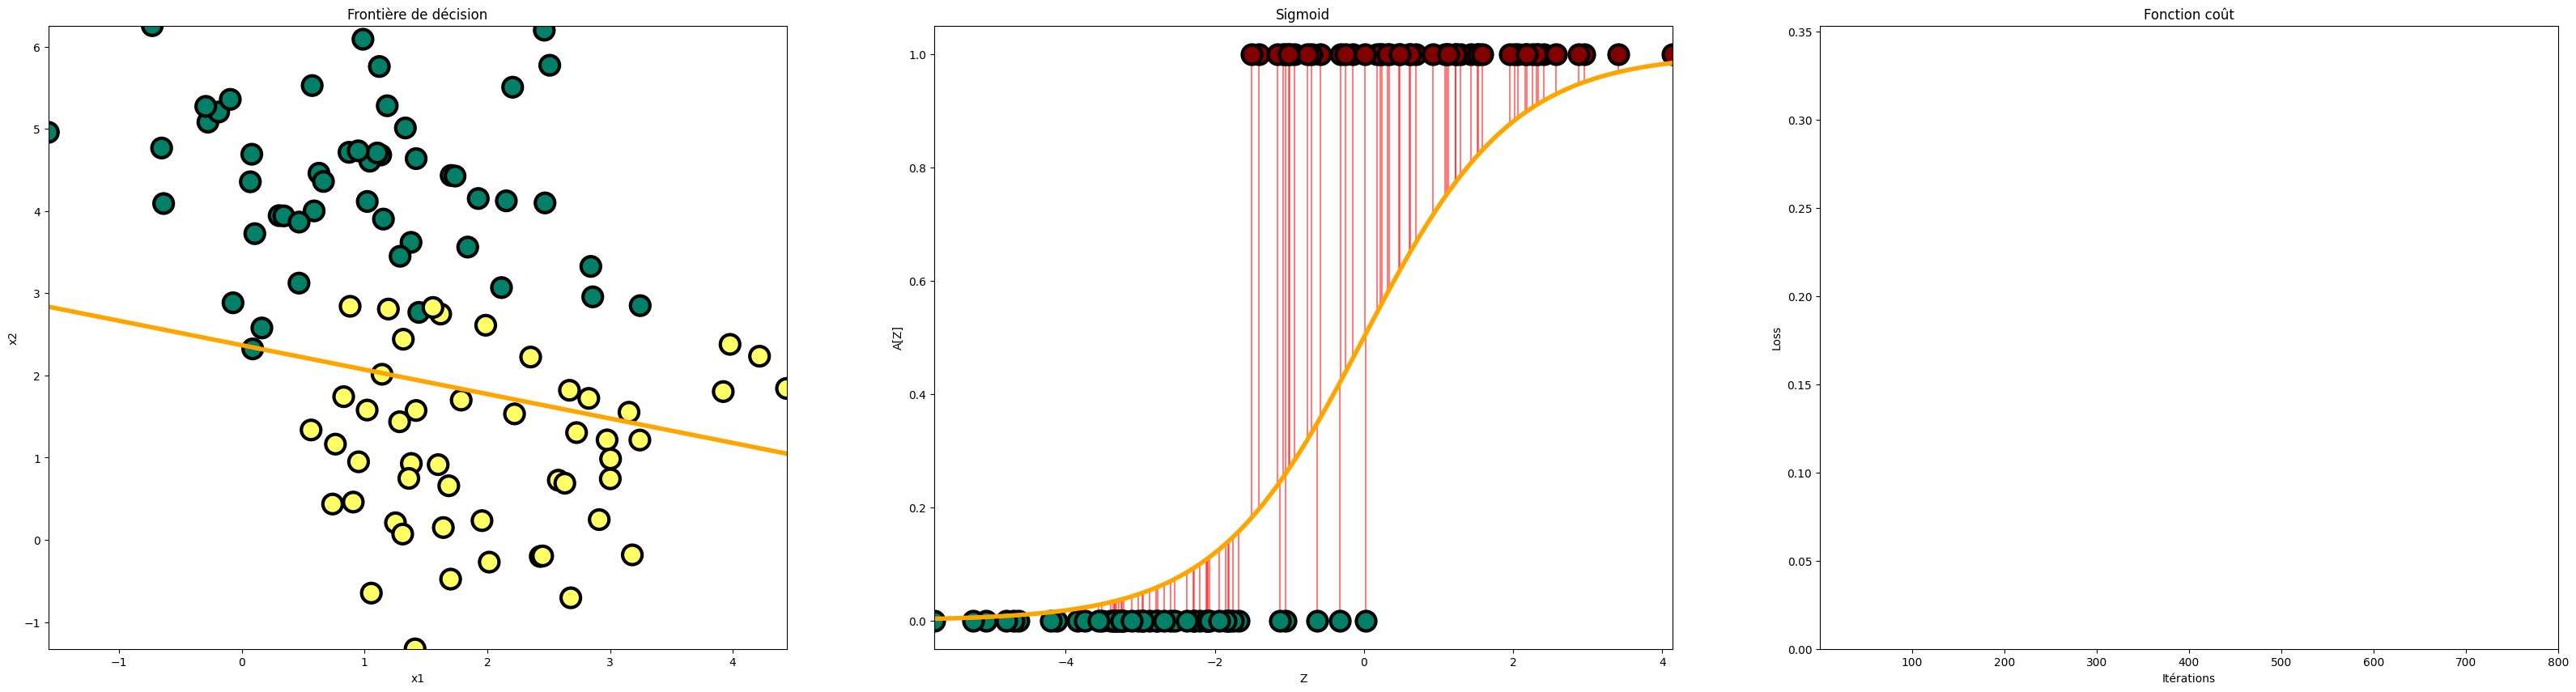

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))
ani = animation.FuncAnimation(fig, animate, frames=history, interval=200, repeat=False)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=3200)
ani.save('animation.mp4', writer=writer)